In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [14]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    #path = os.path.join(cur_path,'train',str(i))
    #images = os.listdir(path)
    
    path = 'stop.jpg' #input('Enter the path of image')
    images = path
    

    try:
        image = Image.open(images)
        image = image.resize((30,30))
        image = np.array(image)
            #sim = Image.fromarray(image)
        data.append(image)
        labels.append(i)
    except:
        print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(43, 30, 30, 3) (43,)


In [15]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(34, 30, 30, 3) (9, 30, 30, 3) (34,) (9,)


In [16]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
2/2 [==============================] - 1s 158ms/step - loss: 107.7070 - accuracy: 0.0000e+00 - val_loss: 28.1697 - val_accuracy: 0.0000e+00
Epoch 2/15
2/2 [==============================] - 0s 38ms/step - loss: 32.0585 - accuracy: 0.0294 - val_loss: 15.4550 - val_accuracy: 0.0000e+00
Epoch 3/15
2/2 [==============================] - 0s 33ms/step - loss: 23.6078 - accuracy: 0.0294 - val_loss: 10.2017 - val_accuracy: 0.0000e+00
Epoch 4/15
2/2 [==============================] - 0s 43ms/step - loss: 15.8877 - accuracy: 0.0588 - val_loss: 6.0541 - val_accuracy: 0.0000e+00
Epoch 5/15
2/2 [==============================] - 0s 35ms/step - loss: 8.1503 - accuracy: 0.0294 - val_loss: 4.4282 - val_accuracy: 0.0000e+00
Epoch 6/15
2/2 [==============================] - 0s 36ms/step - loss: 4.3412 - accuracy: 0.0000e+00 - val_loss: 4.0962 - val_accuracy: 0.0000e+00
Epoch 7/15
2/2 [==============================] - 0s 34ms/step - loss: 3.8117 - accuracy: 0.0000e+00 - val_loss: 4.0173 - val

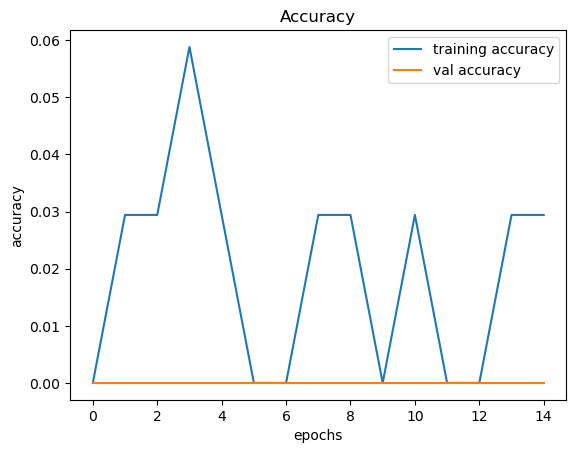

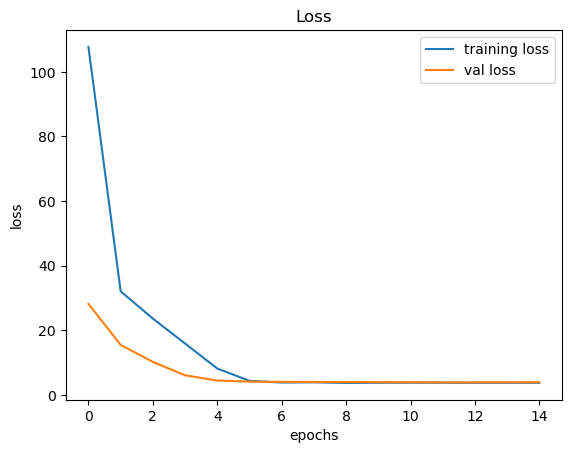

In [18]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

FileNotFoundError: [Errno 2] No such file or directory: 'Test/00000.png'